In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [2]:
N = 5000

naive_nat_lookup = []
naive_nat_new = []
naive_nat = []

quic_nat = []
quic_nat_lookup = []
quic_nat_new = []
quic_nat_update = []

with open("naive_cycles.txt") as f:
    cycles = f.readlines()
    i = 0
    for cycle in cycles:
        i+=1
        if i > N:
            break
        cycle, type_of_operation = cycle.strip().split(",")[:2]
        cycle = int(cycle)/1e6
        type_of_operation = type_of_operation.strip()
        if type_of_operation == "Lookup":
            naive_nat_lookup.append(int(cycle))
        else:
            naive_nat_new.append(int(cycle))
        naive_nat.append(int(cycle))

with open("quic_nat_cycles.txt") as f:
    cycles = f.readlines()
    i = 0
    for cycle in cycles:
        i+=1
        if i > N:
            break
        cycle, type_of_operation = cycle.strip().split(",")[:2]
        cycle = int(cycle)/1e6
        type_of_operation = type_of_operation.strip()
        if type_of_operation == "Lookup":
            quic_nat_lookup.append(int(cycle))
        elif type_of_operation == "New Entry":
            quic_nat_new.append(int(cycle))
        else:
            quic_nat_update.append(int(cycle))
        quic_nat.append(int(cycle))

In [3]:
len(naive_nat), len(quic_nat)

(5000, 5000)

In [4]:
avg_naive = sum(naive_nat) / len(naive_nat)
avg_naive

144.2692

In [5]:
avg_nat = sum(quic_nat) / len(quic_nat)
avg_nat

151.1522

In [6]:
avg_nat / avg_naive

1.0477094209990765

/tmp/ipykernel_4014/878301979.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


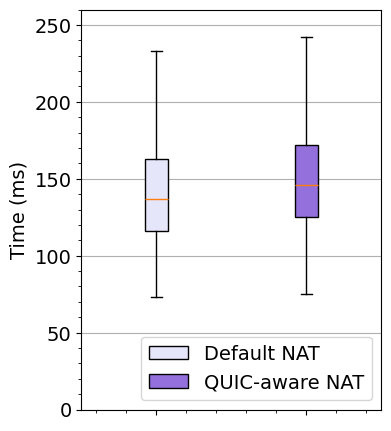

In [7]:

data = [naive_nat, quic_nat]
 
fig = plt.figure(figsize =(3, 4))
 
# Creating axes instance
colors = ['lavender', 'mediumpurple']

ax = fig.add_axes([0, 0, 1, 1])

xticks = ["", ""]
ax.set_xticklabels(xticks)

ax.set_ylabel("Time (ms)")
ax.set_ylim([0, 260])
# ax.set_yticks([100000])#
ax.grid(axis="y")
# ax.grid(axis="y", which="minor")
ax.tick_params(axis='y', which='minor', labelsize=11)
# ax.tick_params(axis='y', which='major', labelsize=11)

# ax.set_yscale("log")
# ax.yaxis.set_minor_formatter(MathTextSciFormatter("%1.0e"))
# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

ax.minorticks_on()
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Default NAT", "QUIC-aware NAT"]
ax.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="lower right")

plt.savefig('naive_quic_box.pdf',bbox_inches='tight', dpi=150)
plt.show()

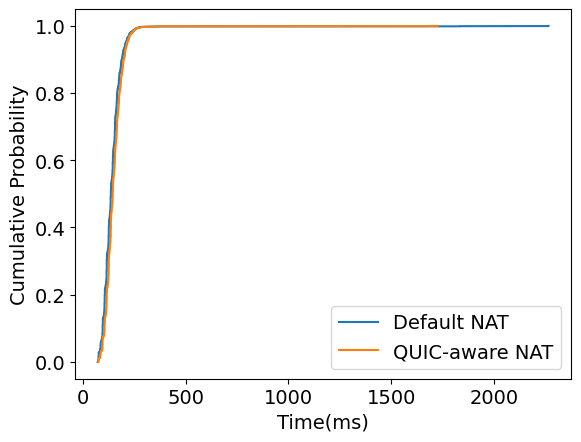

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
  
# No of data points used 
N = len(naive_nat)
    

    
# sort the data in ascending order 
naive_nat = np.sort(naive_nat)
quic_nat = np.sort(quic_nat) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  

plt.xlabel('Time(ms)') 
plt.ylabel('Cumulative Probability') 
  
# plt.title('CDF of Default NAT and QUIC-aware NAT') 
  
plt.plot(naive_nat, y) 
plt.plot(quic_nat, y)
plt.legend(["Default NAT", "QUIC-aware NAT"])
plt.savefig('naive_quic_cdf.pdf',bbox_inches='tight', dpi=150)

/tmp/ipykernel_4014/2268070501.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xticks)
/tmp/ipykernel_4014/2268070501.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xticks)


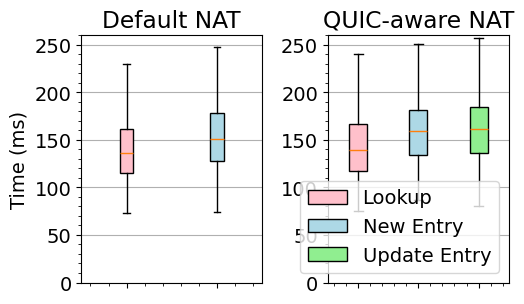

In [9]:

data = [naive_nat_lookup, naive_nat_new]
 
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
fig.tight_layout(pad=3, w_pad=0.5, h_pad=1.0)
axes[0].set_ylabel("Time (in ms)")
# fig.suptitle("Title")
 
# Creating axes instance
colors = ['pink', 'lightblue']

ax1 = axes[0]
ax1.set_title("Default NAT")
ax1.set_ylim(0, 260)
xticks = ["", ""]
ax1.set_xticklabels(xticks)
ax1.set_ylabel("Time (ms)")

ax1.grid(axis="y")
ax1.tick_params(axis='y', which='minor', labelsize=11)

ax1.minorticks_on()
bp = ax1.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Lookup", "New Entry"]
# ax1.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="lower right")

data = [quic_nat_lookup, quic_nat_new, quic_nat_update]

ax2 = axes[1]
ax2.set_ylim(0, 260)
ax2.set_title("QUIC-aware NAT")
colors = ['pink', 'lightblue', 'lightgreen']

xticks = ["", "", ""]
ax2.set_xticklabels(xticks)
# ax2.set_ylabel("Time (ms)")

ax2.grid(axis="y")
ax2.tick_params(axis='y', which='minor', labelsize=11)

ax2.minorticks_on()
bp = ax2.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Lookup", "New Entry", "Update Entry"]
ax2.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2]], labels, loc="lower right")

plt.savefig('processing_speed_stages.pdf',bbox_inches='tight', dpi=150)
plt.show()